<a href="https://colab.research.google.com/github/dhiru-c/Cardiovascular_Risk_Prediction_Capstone_Project/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>



## <b>Data Description </b>
### <b>Demographic:</b>
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ###  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* ###  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ###  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ###  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ###  Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* ###  Tot Chol: total cholesterol level (Continuous)
* ###  Sys BP: systolic blood pressure (Continuous)
* ###  Dia BP: diastolic blood pressure (Continuous)
* ###  BMI: Body Mass Index (Continuous)
* ###  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* ###  Glucose: glucose level (Continuous)
Predict variable (desired target)
* ###  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://drive.google.com/uc?id=1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0')

In [6]:
df.shape

(3390, 17)

In [7]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* ### Normal blood sugar levels for adults	
* ### Fasting	                Less than 100
* ### Before meal	            70-130
* ### 1-2 hours after eating	Less than 180
* ### Bedtime	                100-140

In [10]:
df.describe(include='all',percentiles=(0.01,0.25,0.5,0.75,0.99))

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,33.890000,35.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000


In [11]:
#checking null values
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [12]:
df['glucose'].mean()

82.08651976668827

In [13]:
#inputing null Values
df[['glucose']]    = df[['glucose']].fillna(df['glucose'].median())
df[['education']]  = df[['education']].fillna(df['education'].median())
df[['BPMeds']]     = df[['BPMeds']].fillna(0)
df[['totChol']]    = df[['totChol']].fillna(df['glucose'].median())
df[['cigsPerDay']] = df[['cigsPerDay']].fillna(df['cigsPerDay'].median())
df[['BMI']]        = df[['BMI']].fillna(df['BMI'].median())
df[['heartRate']]  = df[['heartRate']].fillna(df['heartRate'].median())


In [14]:
#checking null values
df.isnull().sum().sort_values(ascending=False)

id                 0
diabetes           0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
prevalentHyp       0
age                0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
is_smoking         0
sex                0
education          0
TenYearCHD         0
dtype: int64

In [15]:
# duplicate
len(df[df.duplicated()])

0

In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

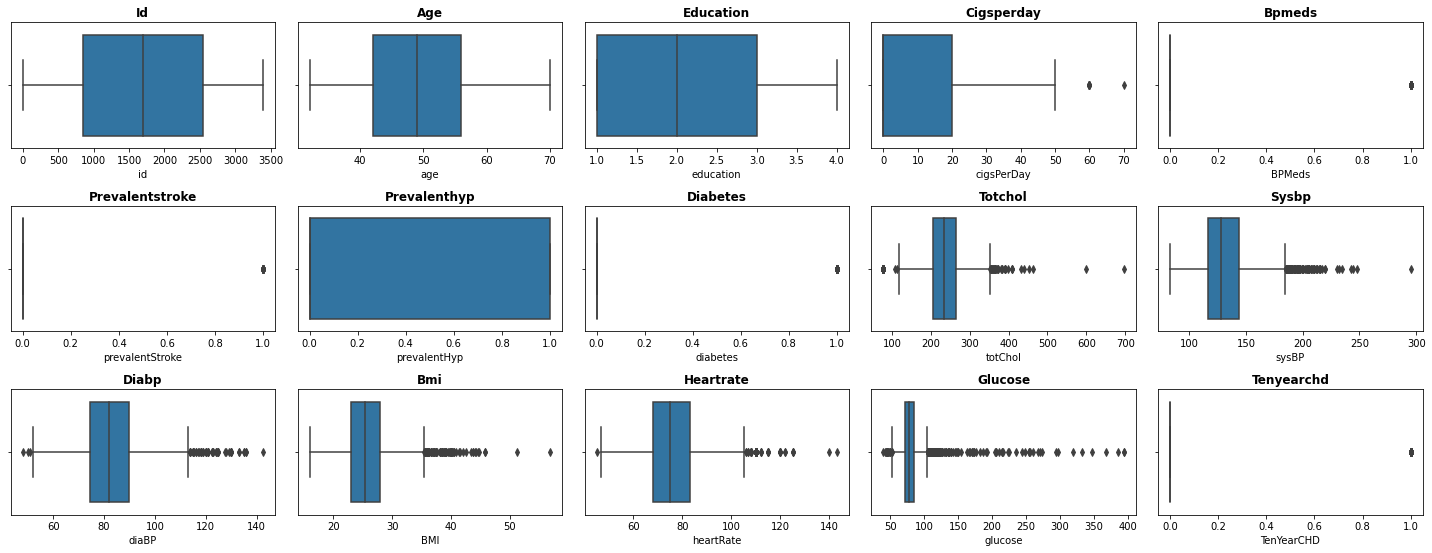

In [17]:
#checking outliers
plt.figure(figsize=(20,15))
n = 1
for column in (df.describe().columns):
  
  plt.subplot(6,5,n)
  n=n+1
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [18]:
#treating outliers 
df.loc[df.cigsPerDay > 40 , 'cigsPerDay'] = 40
df.loc[df.totChol > 400 ,      'totChol'] = 400
df.loc[df.sysBP > 200,           'sysBP'] = 200
df.loc[df.diaBP >  120,          'diaBP'] = 120
df.loc[df.BMI > 40,                'BMI'] = 40
df.loc[df.heartRate > 110 ,  'heartRate'] = 110


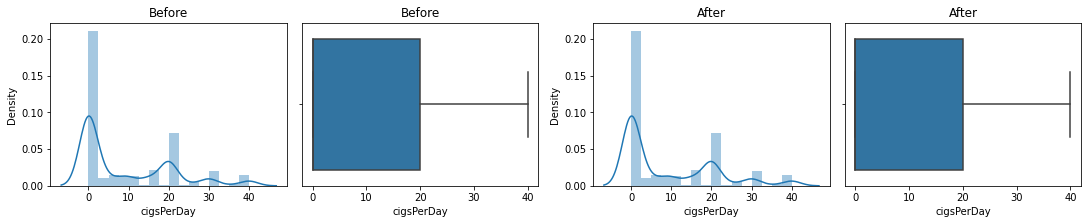

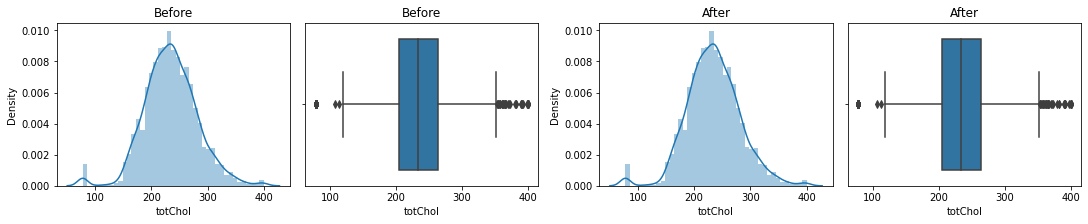

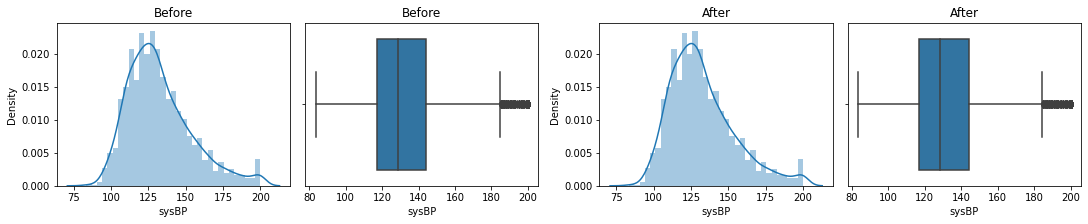

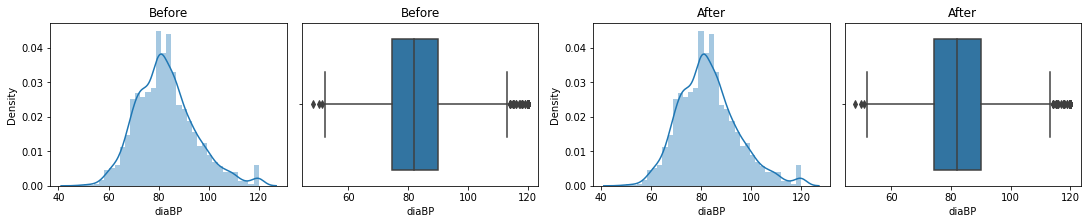

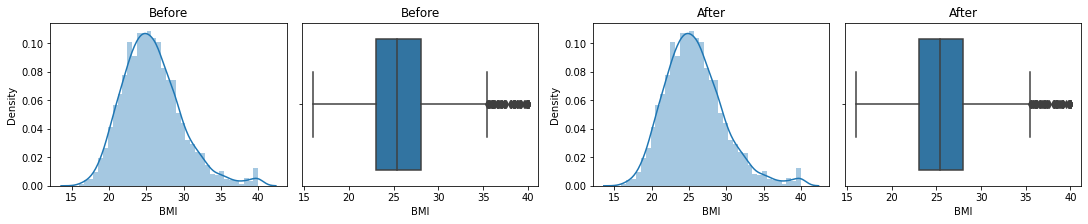

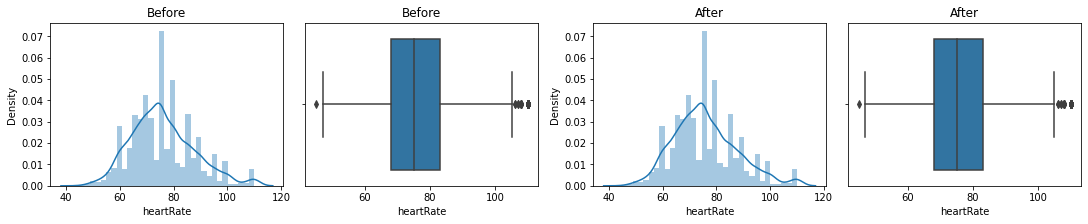

In [19]:
#Plotting Graphs Before treating outliers 
for col in ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate']:
  fig, ax = plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  fig.show()

##**EDA**

In [20]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [21]:
# Defining r to autofit the number and size of plots
r = np.ceil(len(df.columns)/3)

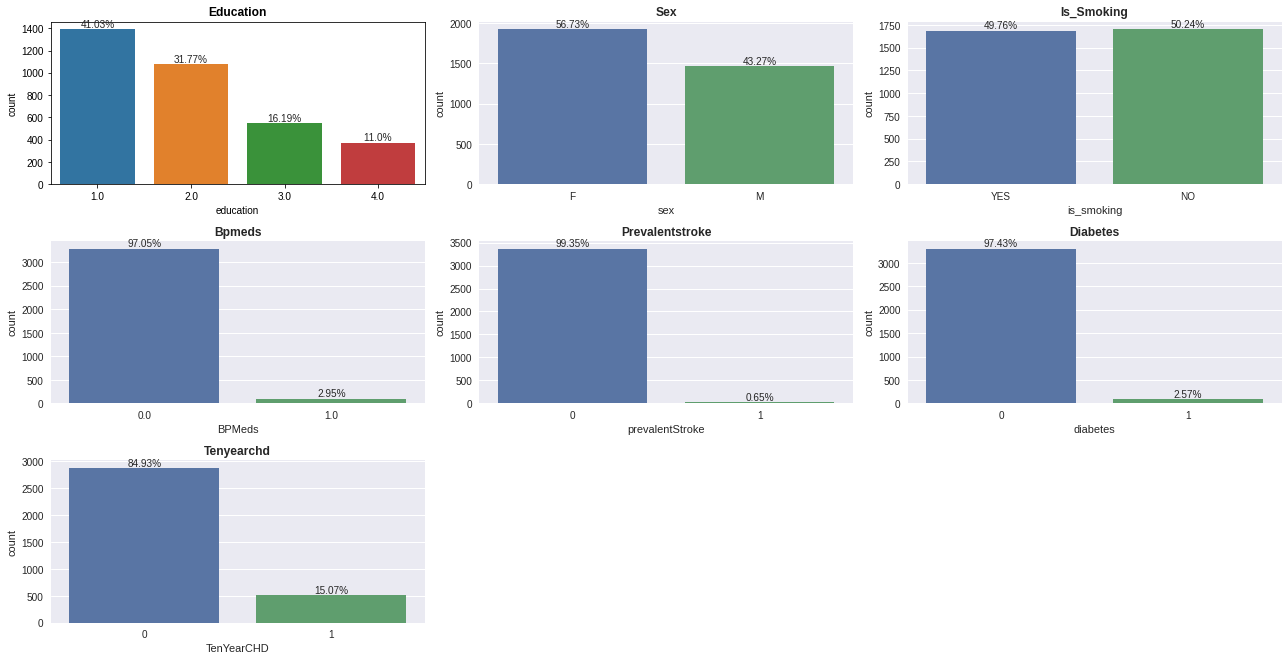

In [22]:
n=1
plt.figure(figsize=(18,r*3))
for column in ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'diabetes',
        'TenYearCHD']:
  plot = plt.subplot(r,3,n)
  n = n+1
  sns.countplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.style.use('seaborn')
  plt.tight_layout()
  annot_percent(plot)

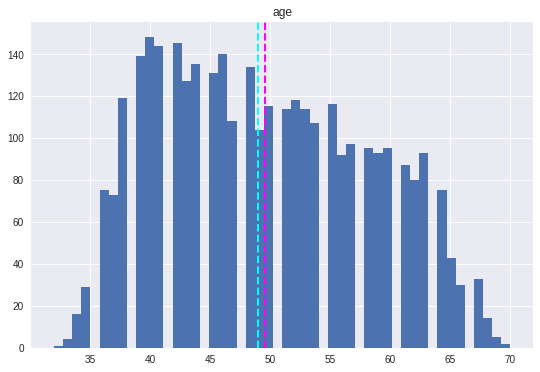

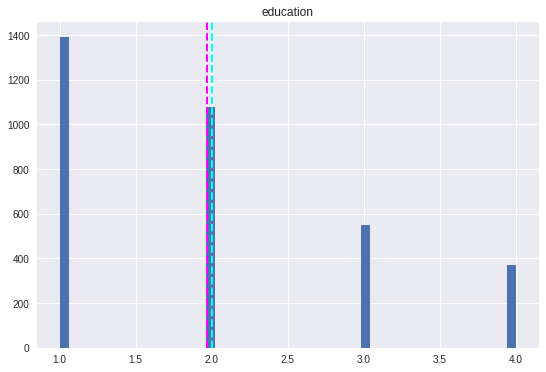

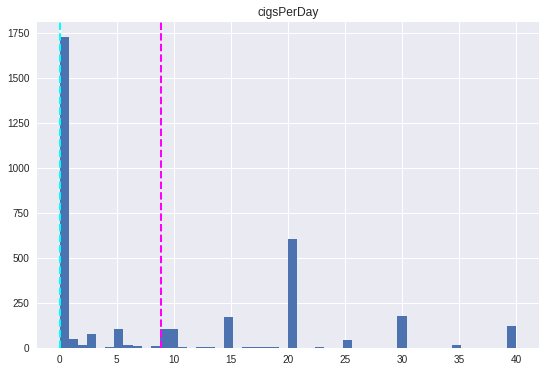

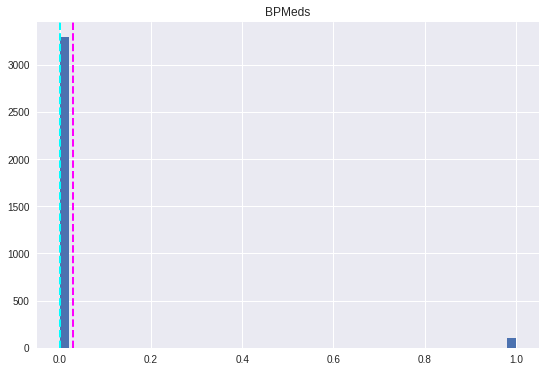

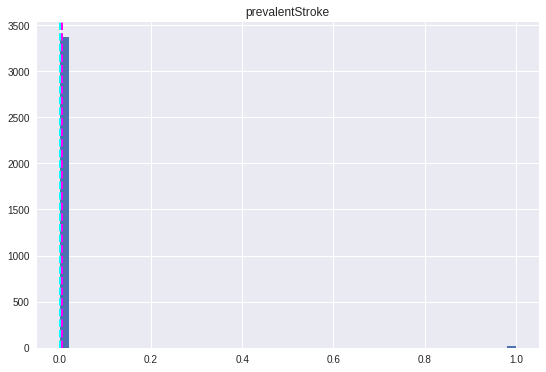

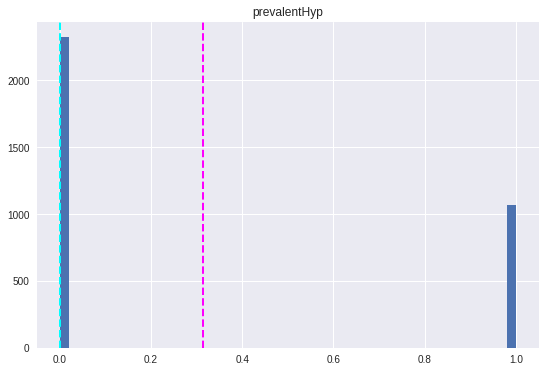

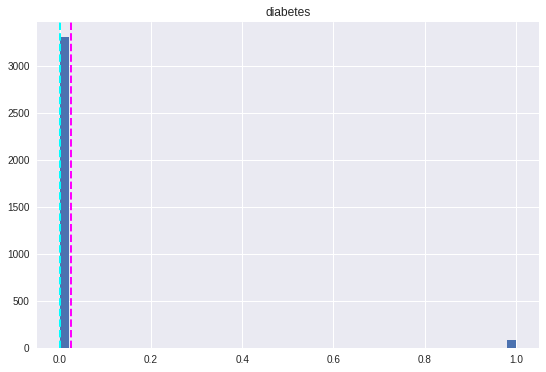

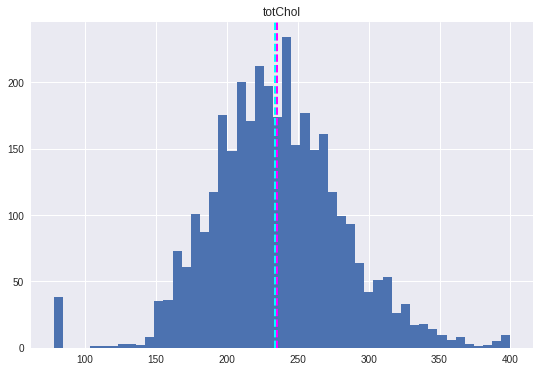

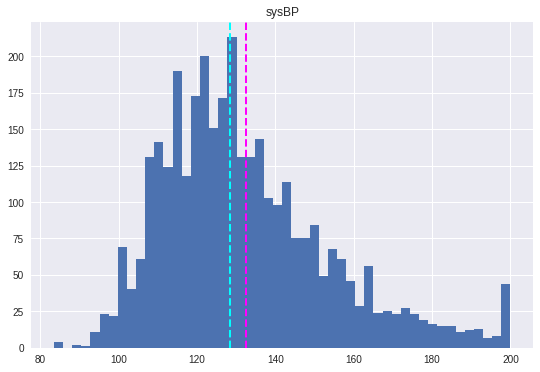

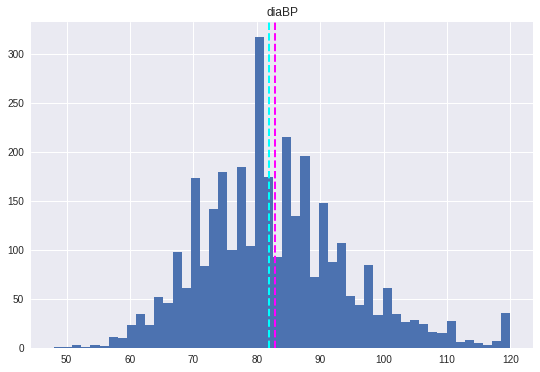

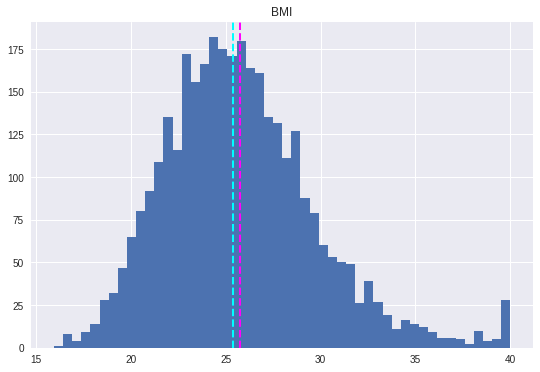

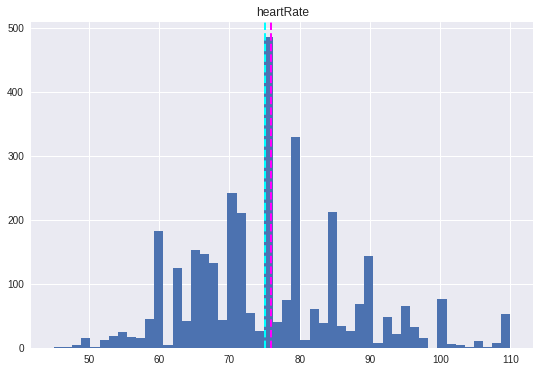

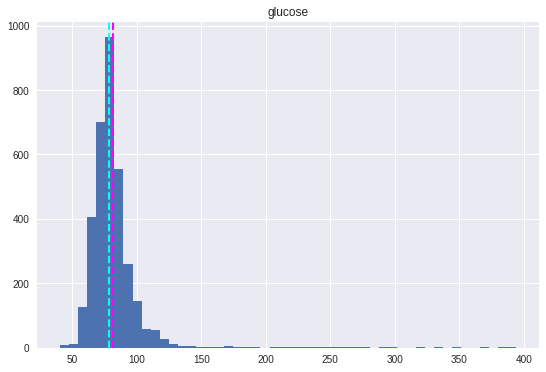

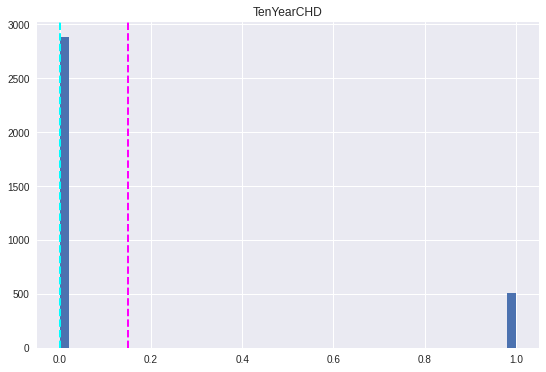

In [24]:
numeric_features = df.describe().columns

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

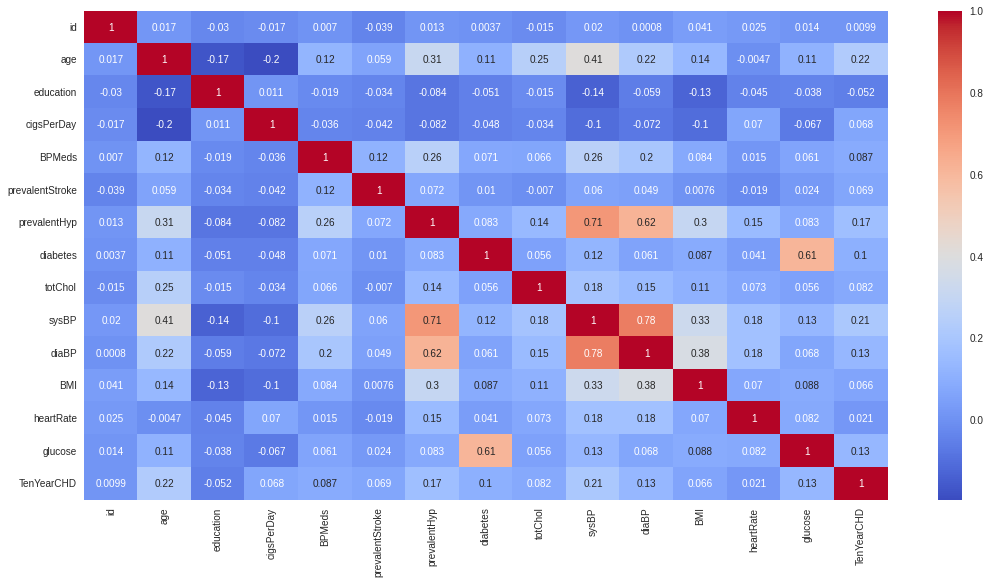

In [25]:
#  annot=True, cmap='coolwarm'
plt.figure(figsize=(18,9))
sns.heatmap(df[df.describe().columns].corr(),annot=True, cmap='coolwarm')